In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
scaler = StandardScaler()
X = np.array(scaler.fit_transform(X))
df = np.c_[X, y]
print(df)

[[-0.52835961  0.96187667 -1.39147228 ... -0.57920652 -0.96024611
   5.        ]
 [-0.29854743  1.96744245 -1.39147228 ...  0.1289504  -0.58477711
   5.        ]
 [-0.29854743  1.29706527 -1.18607043 ... -0.04808883 -0.58477711
   5.        ]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.54204194  0.54162988
   6.        ]
 [-1.39015528  0.65462046 -0.77526673 ...  0.30598963 -0.20930812
   5.        ]
 [-1.33270223 -1.21684919  1.02199944 ...  0.01092425  0.54162988
   6.        ]]


In [4]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5.0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5.0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5.0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6.0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5.0
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6.0
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6.0
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5.0


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

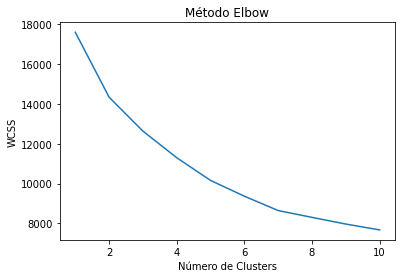

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 1000).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [8]:
pca = PCA(2)
data = np.c_[X_train, y_train]
data = pca.fit_transform(data)

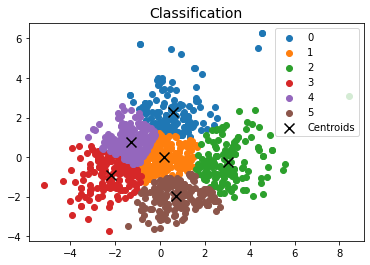

In [9]:
kmeans = KMeans(n_clusters = 6, max_iter = 1000).fit(data)
label = kmeans.labels_
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1], label = i)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'k', marker = 'x', s = 100, label = 'Centroids')
plt.title('Classification', fontsize = 14)
plt.legend()
plt.show()


In [10]:
data_test = np.c_[X_test, y_test]
data_test = pca.fit_transform(data_test)

In [11]:
label_test = kmeans.predict(data_test)

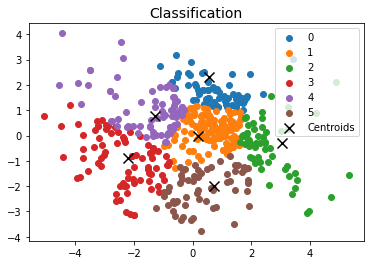

In [12]:
u_labels_test = np.unique(label_test)

for i in u_labels_test:
    plt.scatter(data_test[label_test == i , 0] , data_test[label_test == i , 1], label = i)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'k', marker = 'x', s = 100, label = 'Centroids')
plt.title('Classification', fontsize = 14)
plt.legend()
plt.show()